# 2018-05-17 - Matching Pursuit
En utilisant un [exemple de Laurent](http://blog.invibe.net/posts/2015-05-22-a-hitchhiker-guide-to-matching-pursuit.html) pour la reconstruction d'image à partir de LogGabor, à partir d'une librarie python de matching pursuit : 

In [1]:
from SparseEdges import SparseEdges
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 4
mp.pe.do_mask=False
mp.pe.MP_alpha=1.
mp.pe.do_whitening = False
mp.pe.figpath, name = './mp', 'mptuto'

On génère une image avec deux filtres LogGabor :

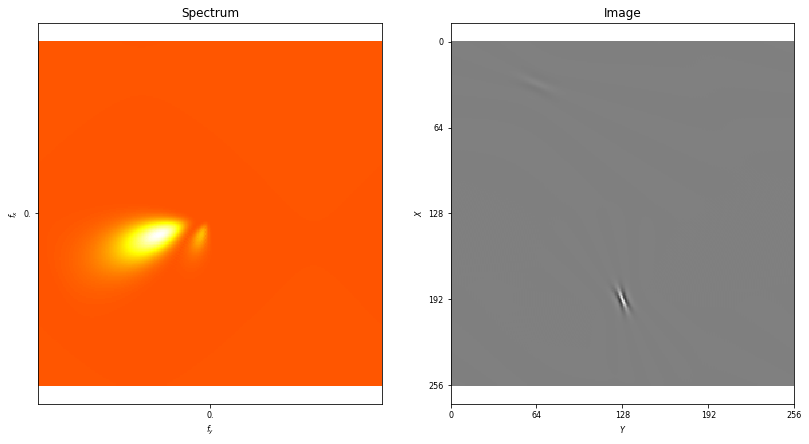

In [2]:
# one
edge_in, C_in= [3*mp.pe.N_X/4, mp.pe.N_Y/2, 2, 2], 42
# the second
edge_bis, C_bis = [mp.pe.N_X/8, mp.pe.N_Y/4, 8, 4], 4.*np.sqrt(2)*np.exp(1j*np.pi/4.)

# filters in Fourier space
FT_lg_in = mp.loggabor(edge_in[0], edge_in[1], sf_0=mp.sf_0[edge_in[3]],
                         B_sf=mp.pe.B_sf, theta= mp.theta[edge_in[2]], B_theta=mp.pe.B_theta)
FT_lg_bis = mp.loggabor(edge_bis[0], edge_bis[1], sf_0=mp.sf_0[edge_bis[3]],
                         B_sf=mp.pe.B_sf, theta= mp.theta[edge_bis[2]], B_theta=mp.pe.B_theta)
# mixing both and shows one
FT_lg_ = C_in *  FT_lg_in + C_bis * FT_lg_bis
image = mp.invert(FT_lg_)

_ = mp.show_FT(FT_lg_, axis=True)

Coordinates of the maximum  (192, 128, 2, 2) , true value:  [192.0, 128.0, 2, 2]
Value of the maximum  (41.99999999999932+4.21101828439962e-13j) , true value:  42


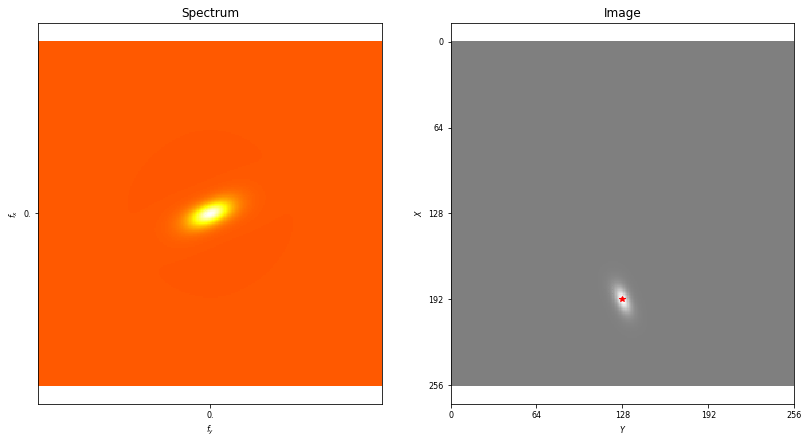

In [3]:
C = mp.linear_pyramid(image)

edge_star = mp.argmax(C)
print('Coordinates of the maximum ', edge_star, ', true value: ', edge_in)
print('Value of the maximum ', C[edge_star], ', true value: ', C_in)

fig, a1, a2 = mp.show_spectrum(np.absolute(C[:, :, edge_star[2], edge_star[3]]), axis=True)
_ = a2.plot([edge_star[1]], [edge_star[0]], 'r*')

Sur notre image générée, c'est l'étape de *matching* et ça donne :

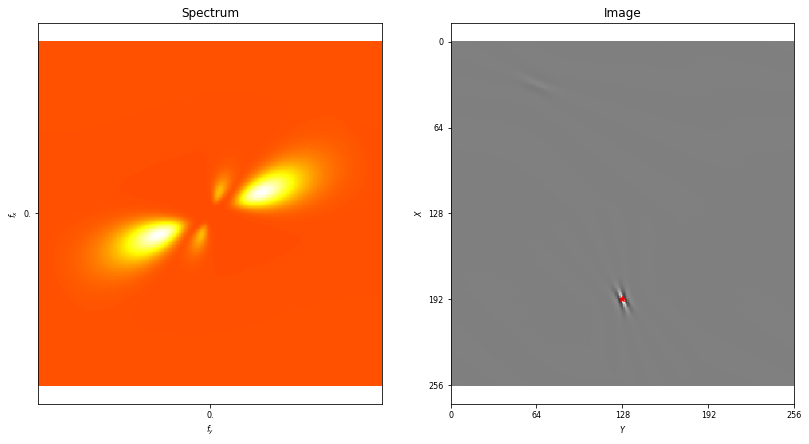

In [4]:
fig, a1, a2 = mp.show_spectrum(image, axis=True)
_ = a2.plot([edge_star[1]], [edge_star[0]], 'r*')

On extrait le gagnant :

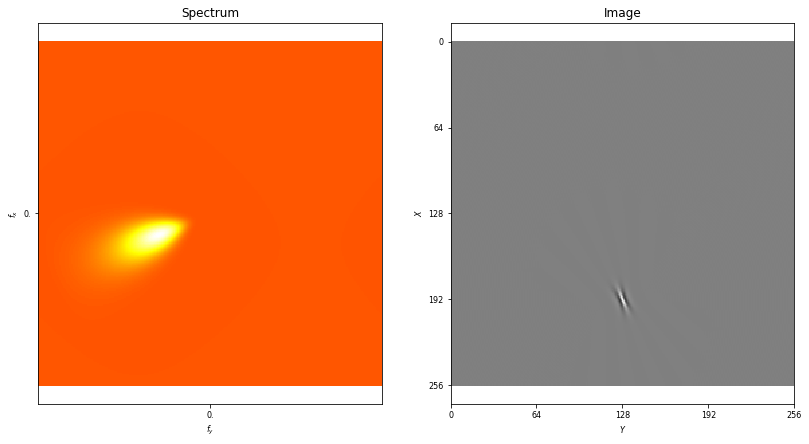

In [5]:
FT_star = mp.loggabor(edge_star[0], edge_star[1], sf_0=mp.sf_0[edge_star[3]],
                         B_sf=mp.pe.B_sf, theta= mp.theta[edge_star[2]], B_theta=mp.pe.B_theta)
im_star = mp.invert(FT_star)
_ = mp.show_FT(FT_star, axis=True)

Maintenant on retire le gagnant de l'image d'origine, c'est l'étape de *pursuit* :

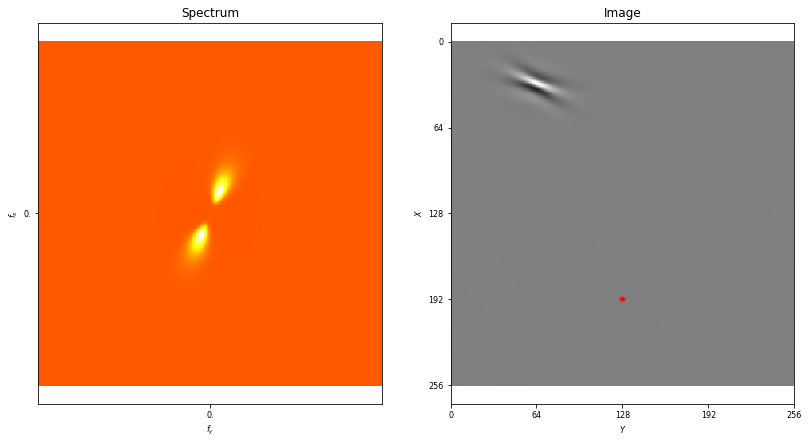

In [6]:
image_res = (image - C[edge_star] * im_star).real 
fig, a1, a2 = mp.show_spectrum(image_res, axis=True)
_ = a2.plot([edge_star[1]], [edge_star[0]], 'r*')

Maintenant on refait une étape de matching :

Coordinates of the maximum  (32, 64, 8, 4) , true value:  [32.0, 64.0, 8, 4]
Value of the maximum  (4+4.000000000000005j) , true value:  (4.000000000000001+4j)


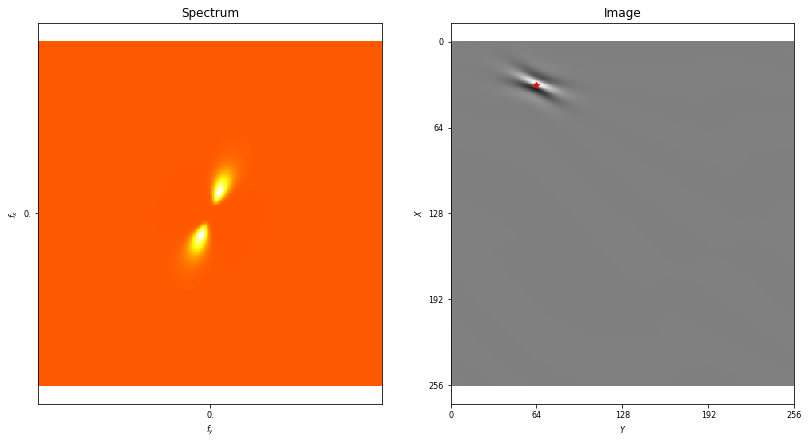

In [7]:
C = mp.linear_pyramid(image_res)

edge_star_bis = mp.argmax(C)
print('Coordinates of the maximum ', edge_star_bis, ', true value: ', edge_bis)
print('Value of the maximum ', C[edge_star_bis], ', true value: ', C_bis)

fig, a1, a2 = mp.show_spectrum(image_res, axis=True)
_ = a2.plot([edge_star_bis[1]], [edge_star_bis[0]], 'r*')

Toutes ces étapes peuvent être executées dans la fonction run_mp :

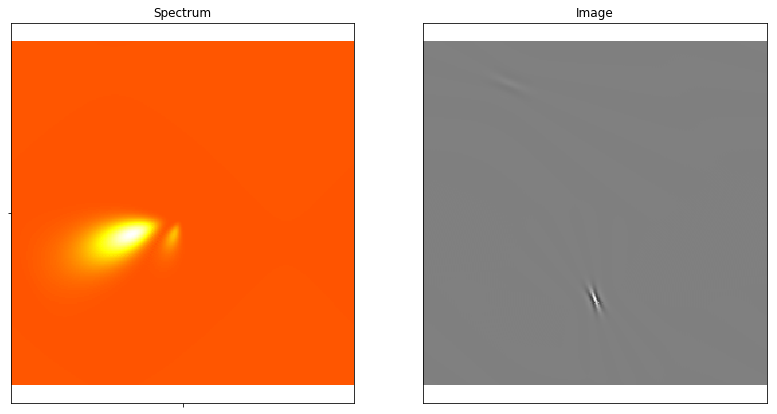

In [8]:
# filters in Fourier space
FT_lg_in = mp.loggabor(edge_in[0], edge_in[1], sf_0=mp.sf_0[edge_in[3]],
                         B_sf=mp.pe.B_sf, theta= mp.theta[edge_in[2]], B_theta=mp.pe.B_theta)
FT_lg_bis = mp.loggabor(edge_bis[0], edge_bis[1], sf_0=mp.sf_0[edge_bis[3]],
                         B_sf=mp.pe.B_sf, theta= mp.theta[edge_bis[2]], B_theta=mp.pe.B_theta)
# mixing both and shows one
FT_lg_ = C_in *  FT_lg_in + C_bis * FT_lg_bis

fig = mp.show_FT(FT_lg_)

In [9]:
image = mp.invert(FT_lg_)
edges, C_res = mp.run_mp(image, verbose=True)

Edge  0 / 4  - Max activity  :  41.99999999999932  phase=  5.744608932107684e-13  deg,  @  (192, 128, 2, 2)
Edge  1 / 4  - Max activity  :  5.656854249492383  phase=  45.00000000000003  deg,  @  (32, 64, 8, 4)
Edge  2 / 4  - Max activity  :  7.97505112859936e-13  phase=  -31.789717833269616  deg,  @  (192, 128, 2, 2)
Edge  3 / 4  - Max activity  :  1.194945776057188e-14  phase=  -2.9473199082355244  deg,  @  (195, 129, 1, 2)


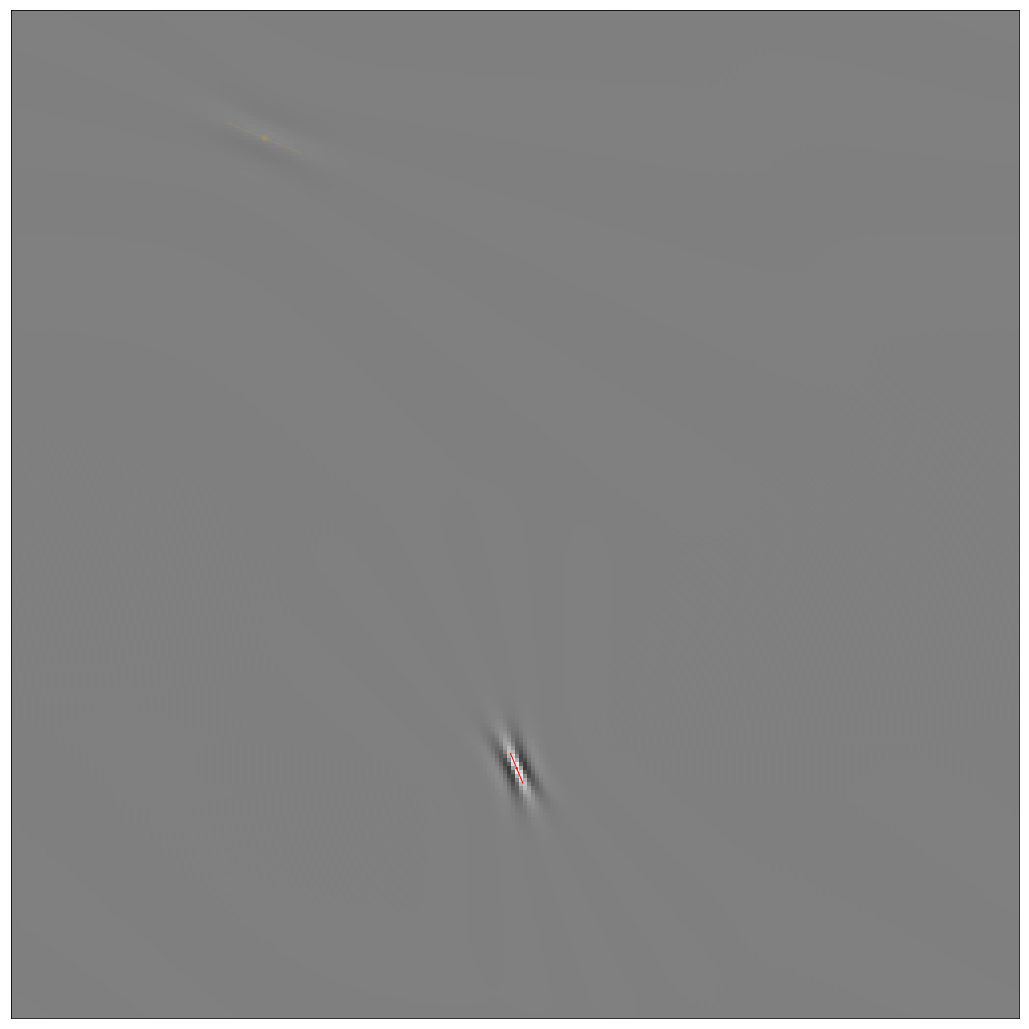

In [10]:
fig, a = mp.show_edges(edges, image=image)

## Matching pursuit avec une image naturelle
Maintenant avec une jolie [photo](https://farm7.staticflickr.com/6058/6370387703_5e718ea681_q_d.jpg)  :

In [11]:
from SparseEdges import SparseEdges
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 2048
mp.pe.MP_alpha=1.
mp.pe.figpath, name = './mp', 'mpnaturalimage'

image = mp.imread('tiger.jpg')
mp.init()
image = mp.normalize(image, center=True)

In [12]:
edges, C_res = mp.run_mp(image, verbose=True)

Edge  0 / 2048  - Max activity  :  4.310396089122908  phase=  -173.9658780385025  deg,  @  (57, 70, 13, 2)
Edge  1 / 2048  - Max activity  :  3.4677034458805283  phase=  -153.3147494882903  deg,  @  (53, 59, 12, 2)
Edge  2 / 2048  - Max activity  :  3.1861330898815896  phase=  -35.29250558044702  deg,  @  (84, 54, 22, 3)
Edge  3 / 2048  - Max activity  :  2.958497731838346  phase=  27.958290252250997  deg,  @  (72, 38, 10, 1)
Edge  4 / 2048  - Max activity  :  2.642158449017417  phase=  158.1262352468204  deg,  @  (48, 75, 14, 2)
Edge  5 / 2048  - Max activity  :  2.6385574460654206  phase=  -143.21609793886915  deg,  @  (43, 98, 13, 1)
Edge  6 / 2048  - Max activity  :  2.6083162936536493  phase=  -117.15054571178362  deg,  @  (62, 80, 10, 0)
Edge  7 / 2048  - Max activity  :  2.599298894404874  phase=  -107.80418368822859  deg,  @  (47, 51, 16, 3)
Edge  8 / 2048  - Max activity  :  2.5164571047647892  phase=  -141.0183265855892  deg,  @  (46, 62, 13, 1)
Edge  9 / 2048  - Max activity

Edge  76 / 2048  - Max activity  :  1.1612237251364046  phase=  -125.51724375305326  deg,  @  (88, 52, 1, 1)
Edge  77 / 2048  - Max activity  :  1.1616933908941909  phase=  148.65475478634374  deg,  @  (73, 43, 3, 1)
Edge  78 / 2048  - Max activity  :  1.160388576417558  phase=  -84.47837928994329  deg,  @  (58, 51, 18, 1)
Edge  79 / 2048  - Max activity  :  1.159459520409421  phase=  61.5610620551246  deg,  @  (28, 73, 10, 2)
Edge  80 / 2048  - Max activity  :  1.1392068957134844  phase=  -2.437431575858192  deg,  @  (37, 92, 8, 2)
Edge  81 / 2048  - Max activity  :  1.1256671667593918  phase=  -102.14669075040855  deg,  @  (48, 20, 3, 1)
Edge  82 / 2048  - Max activity  :  1.122662541339338  phase=  -39.83437445839327  deg,  @  (71, 25, 23, 1)
Edge  83 / 2048  - Max activity  :  1.1171797290749292  phase=  -161.30764092810685  deg,  @  (50, 47, 17, 1)
Edge  84 / 2048  - Max activity  :  1.116845165670552  phase=  70.46975345140771  deg,  @  (60, 89, 11, 2)
Edge  85 / 2048  - Max acti

Edge  152 / 2048  - Max activity  :  0.8258293417682228  phase=  74.84895118305494  deg,  @  (98, 77, 23, 2)
Edge  153 / 2048  - Max activity  :  0.8229308187672293  phase=  101.52750282327227  deg,  @  (117, 37, 0, 3)
Edge  154 / 2048  - Max activity  :  0.8227313214627605  phase=  54.37428111477322  deg,  @  (57, 121, 22, 3)
Edge  155 / 2048  - Max activity  :  0.8205745747147941  phase=  27.67191597618716  deg,  @  (48, 92, 13, 0)
Edge  156 / 2048  - Max activity  :  0.8103849126604139  phase=  102.18510861766929  deg,  @  (46, 113, 9, 2)
Edge  157 / 2048  - Max activity  :  0.8065206148760389  phase=  89.12879560776722  deg,  @  (44, 70, 23, 2)
Edge  158 / 2048  - Max activity  :  0.8042957401203412  phase=  84.94819848864812  deg,  @  (85, 28, 4, 1)
Edge  159 / 2048  - Max activity  :  0.7953411147158562  phase=  177.28000322950848  deg,  @  (64, 59, 16, 0)
Edge  160 / 2048  - Max activity  :  0.7867926877215466  phase=  145.3102554947988  deg,  @  (40, 68, 11, 1)
Edge  161 / 2048

Edge  227 / 2048  - Max activity  :  0.6312995402774707  phase=  2.097478775448796  deg,  @  (72, 97, 18, 2)
Edge  228 / 2048  - Max activity  :  0.6293866422233053  phase=  178.9250429510505  deg,  @  (57, 73, 23, 2)
Edge  229 / 2048  - Max activity  :  0.6270801192111674  phase=  90.14046630205219  deg,  @  (64, 106, 23, 1)
Edge  230 / 2048  - Max activity  :  0.6232695604685146  phase=  91.00328208152604  deg,  @  (89, 53, 15, 1)
Edge  231 / 2048  - Max activity  :  0.6154704948277835  phase=  51.48468596178745  deg,  @  (84, 108, 4, 1)
Edge  232 / 2048  - Max activity  :  0.6152238982574644  phase=  -68.85355701229524  deg,  @  (58, 82, 18, 2)
Edge  233 / 2048  - Max activity  :  0.6149187965689539  phase=  -84.42734178576357  deg,  @  (96, 123, 21, 1)
Edge  234 / 2048  - Max activity  :  0.6145157448736585  phase=  68.31677346982238  deg,  @  (102, 100, 1, 1)
Edge  235 / 2048  - Max activity  :  0.6130992296826067  phase=  -98.98017447439896  deg,  @  (46, 47, 6, 2)
Edge  236 / 20

Edge  302 / 2048  - Max activity  :  0.5239255070776875  phase=  -18.877107241303783  deg,  @  (50, 119, 9, 1)
Edge  303 / 2048  - Max activity  :  0.5229104623120876  phase=  -141.6214329834754  deg,  @  (67, 42, 14, 0)
Edge  304 / 2048  - Max activity  :  0.5209928271704346  phase=  27.11047685827143  deg,  @  (58, 36, 12, 4)
Edge  305 / 2048  - Max activity  :  0.5197999133624727  phase=  66.51967803985383  deg,  @  (37, 87, 15, 1)
Edge  306 / 2048  - Max activity  :  0.5192746709682113  phase=  74.37748354822348  deg,  @  (67, 102, 13, 1)
Edge  307 / 2048  - Max activity  :  0.5208045501591311  phase=  71.35865202026484  deg,  @  (57, 105, 16, 2)
Edge  308 / 2048  - Max activity  :  0.5188716444973713  phase=  37.474708035290114  deg,  @  (38, 98, 15, 0)
Edge  309 / 2048  - Max activity  :  0.5174739422631488  phase=  -65.54553470020349  deg,  @  (103, 51, 23, 6)
Edge  310 / 2048  - Max activity  :  0.5169131819957313  phase=  -96.53903965998705  deg,  @  (50, 61, 12, 0)
Edge  311 

Edge  377 / 2048  - Max activity  :  0.45214626137655434  phase=  138.49353963790338  deg,  @  (69, 85, 22, 0)
Edge  378 / 2048  - Max activity  :  0.4517220096720031  phase=  107.66253770433043  deg,  @  (22, 45, 22, 2)
Edge  379 / 2048  - Max activity  :  0.451551721611751  phase=  -137.2260000218275  deg,  @  (68, 82, 9, 0)
Edge  380 / 2048  - Max activity  :  0.4507494442433289  phase=  65.56304690304333  deg,  @  (131, 95, 1, 2)
Edge  381 / 2048  - Max activity  :  0.44890634386443456  phase=  76.07366405853203  deg,  @  (53, 95, 5, 1)
Edge  382 / 2048  - Max activity  :  0.44822248995067937  phase=  49.99357909513473  deg,  @  (42, 106, 13, 0)
Edge  383 / 2048  - Max activity  :  0.44813564051963406  phase=  50.40383488078148  deg,  @  (71, 33, 16, 1)
Edge  384 / 2048  - Max activity  :  0.44785774344245655  phase=  -19.408686429544538  deg,  @  (93, 98, 16, 1)
Edge  385 / 2048  - Max activity  :  0.44681069817647845  phase=  -43.073699424086676  deg,  @  (17, 83, 6, 2)
Edge  386

Edge  452 / 2048  - Max activity  :  0.3882241454397115  phase=  -33.808375006588506  deg,  @  (17, 85, 0, 2)
Edge  453 / 2048  - Max activity  :  0.3869782444123862  phase=  -110.24558634582516  deg,  @  (55, 98, 17, 1)
Edge  454 / 2048  - Max activity  :  0.386806889501376  phase=  42.1064300445139  deg,  @  (54, 16, 14, 1)
Edge  455 / 2048  - Max activity  :  0.38673127442900374  phase=  95.03495894513024  deg,  @  (64, 63, 18, 0)
Edge  456 / 2048  - Max activity  :  0.3858468443352202  phase=  146.307959201709  deg,  @  (42, 31, 7, 2)
Edge  457 / 2048  - Max activity  :  0.38536525498699786  phase=  -85.42515399495315  deg,  @  (55, 105, 6, 0)
Edge  458 / 2048  - Max activity  :  0.3848080254448401  phase=  -104.39337090080738  deg,  @  (62, 91, 23, 0)
Edge  459 / 2048  - Max activity  :  0.3847671423628286  phase=  121.00645398295666  deg,  @  (100, 95, 20, 1)
Edge  460 / 2048  - Max activity  :  0.3847230513027998  phase=  57.222352905530016  deg,  @  (71, 111, 13, 0)
Edge  461 /

Edge  527 / 2048  - Max activity  :  0.3448325573832309  phase=  154.15485509668858  deg,  @  (33, 63, 8, 1)
Edge  528 / 2048  - Max activity  :  0.3446772622810124  phase=  159.4829904380315  deg,  @  (80, 129, 4, 1)
Edge  529 / 2048  - Max activity  :  0.3698472048880034  phase=  -39.537503779091715  deg,  @  (79, 123, 5, 1)
Edge  530 / 2048  - Max activity  :  0.34457865788420894  phase=  -104.99579783979677  deg,  @  (88, 130, 17, 5)
Edge  531 / 2048  - Max activity  :  0.343837950569045  phase=  13.697606727263725  deg,  @  (74, 93, 19, 0)
Edge  532 / 2048  - Max activity  :  0.3430572419864571  phase=  -123.28531206080704  deg,  @  (130, 37, 2, 3)
Edge  533 / 2048  - Max activity  :  0.3423975197044568  phase=  -147.07700711397413  deg,  @  (61, 112, 21, 3)
Edge  534 / 2048  - Max activity  :  0.3422883967600491  phase=  166.5627801962604  deg,  @  (62, 72, 4, 0)
Edge  535 / 2048  - Max activity  :  0.3408879556077367  phase=  -127.06066103457113  deg,  @  (18, 73, 20, 4)
Edge  5

Edge  602 / 2048  - Max activity  :  0.3107670919874362  phase=  -163.37112125157864  deg,  @  (79, 30, 2, 0)
Edge  603 / 2048  - Max activity  :  0.3104017736943404  phase=  -136.78476801562704  deg,  @  (69, 100, 3, 0)
Edge  604 / 2048  - Max activity  :  0.31021840185998467  phase=  -173.48642558025168  deg,  @  (99, 129, 0, 4)
Edge  605 / 2048  - Max activity  :  0.30900745400882235  phase=  19.542929227481036  deg,  @  (112, 118, 1, 1)
Edge  606 / 2048  - Max activity  :  0.3087982923488911  phase=  -4.539881428192758  deg,  @  (53, 55, 19, 0)
Edge  607 / 2048  - Max activity  :  0.30857106186881345  phase=  -52.47632515653985  deg,  @  (128, 52, 16, 2)
Edge  608 / 2048  - Max activity  :  0.3107109592096034  phase=  -76.83771122121003  deg,  @  (134, 55, 17, 1)
Edge  609 / 2048  - Max activity  :  0.30819977360979517  phase=  -47.44077541422789  deg,  @  (49, 78, 17, 1)
Edge  610 / 2048  - Max activity  :  0.3079845325776976  phase=  103.06746398271179  deg,  @  (46, 49, 15, 0)
E

Edge  677 / 2048  - Max activity  :  0.2835309287517606  phase=  -130.12446164070028  deg,  @  (23, 107, 4, 3)
Edge  678 / 2048  - Max activity  :  0.2833938846186939  phase=  104.53705117243422  deg,  @  (58, 49, 2, 0)
Edge  679 / 2048  - Max activity  :  0.2827750191173419  phase=  -15.147271038272473  deg,  @  (70, 49, 7, 6)
Edge  680 / 2048  - Max activity  :  0.2826124872961184  phase=  51.851829353214164  deg,  @  (70, 77, 9, 0)
Edge  681 / 2048  - Max activity  :  0.2824984184998051  phase=  112.22539396664136  deg,  @  (79, 138, 0, 2)
Edge  682 / 2048  - Max activity  :  0.2820415961565682  phase=  -63.371522551860046  deg,  @  (48, 117, 20, 2)
Edge  683 / 2048  - Max activity  :  0.2819619037138488  phase=  171.3619068571525  deg,  @  (58, 60, 13, 3)
Edge  684 / 2048  - Max activity  :  0.281647588606145  phase=  49.63898944445397  deg,  @  (50, 39, 22, 1)
Edge  685 / 2048  - Max activity  :  0.28086702517969564  phase=  145.71103777091977  deg,  @  (124, 98, 0, 1)
Edge  686 /

Edge  752 / 2048  - Max activity  :  0.25545927293243914  phase=  83.89111224456884  deg,  @  (103, 105, 5, 1)
Edge  753 / 2048  - Max activity  :  0.25541299964802705  phase=  153.16798720189027  deg,  @  (68, 128, 5, 1)
Edge  754 / 2048  - Max activity  :  0.2552506462217237  phase=  134.06516334420928  deg,  @  (24, 93, 18, 1)
Edge  755 / 2048  - Max activity  :  0.2552468654716335  phase=  -62.323585098250994  deg,  @  (87, 18, 3, 5)
Edge  756 / 2048  - Max activity  :  0.25527549814341194  phase=  6.238178815830591  deg,  @  (27, 108, 9, 6)
Edge  757 / 2048  - Max activity  :  0.2549572350255249  phase=  104.19069479211598  deg,  @  (76, 106, 21, 1)
Edge  758 / 2048  - Max activity  :  0.2548379435044663  phase=  7.666670292570901  deg,  @  (64, 75, 13, 3)
Edge  759 / 2048  - Max activity  :  0.2546687432699589  phase=  163.33195429339102  deg,  @  (52, 93, 15, 0)
Edge  760 / 2048  - Max activity  :  0.2543326383421053  phase=  44.76171517862765  deg,  @  (98, 122, 3, 2)
Edge  761

Edge  827 / 2048  - Max activity  :  0.2354851662566388  phase=  -99.53080481802002  deg,  @  (56, 27, 2, 0)
Edge  828 / 2048  - Max activity  :  0.2346081982999575  phase=  -33.42371239546156  deg,  @  (73, 54, 21, 1)
Edge  829 / 2048  - Max activity  :  0.23436235778554249  phase=  80.39684265960256  deg,  @  (6, 87, 10, 2)
Edge  830 / 2048  - Max activity  :  0.23399538301457457  phase=  -163.2804806391576  deg,  @  (46, 86, 1, 1)
Edge  831 / 2048  - Max activity  :  0.23368595194581487  phase=  62.25331931718954  deg,  @  (57, 97, 14, 0)
Edge  832 / 2048  - Max activity  :  0.23324929735137276  phase=  -63.30619145884489  deg,  @  (80, 111, 15, 0)
Edge  833 / 2048  - Max activity  :  0.23302200746402038  phase=  -90.25202142383282  deg,  @  (43, 30, 21, 0)
Edge  834 / 2048  - Max activity  :  0.2323576074146075  phase=  -72.81956053990307  deg,  @  (48, 68, 19, 0)
Edge  835 / 2048  - Max activity  :  0.23232004824867927  phase=  158.79645389886048  deg,  @  (82, 26, 5, 0)
Edge  836

Edge  902 / 2048  - Max activity  :  0.21349899200972836  phase=  59.17962553661423  deg,  @  (27, 74, 4, 4)
Edge  903 / 2048  - Max activity  :  0.2133049342000098  phase=  10.823722334472743  deg,  @  (143, 68, 8, 1)
Edge  904 / 2048  - Max activity  :  0.2131308528233263  phase=  -158.75839192652649  deg,  @  (50, 56, 15, 0)
Edge  905 / 2048  - Max activity  :  0.2130319873578917  phase=  -101.61682782287632  deg,  @  (42, 48, 6, 2)
Edge  906 / 2048  - Max activity  :  0.2128592732243413  phase=  -11.300148768791741  deg,  @  (89, 99, 11, 2)
Edge  907 / 2048  - Max activity  :  0.2128229302251947  phase=  -86.71644561667809  deg,  @  (85, 49, 3, 1)
Edge  908 / 2048  - Max activity  :  0.21254866828094016  phase=  -5.811389723308841  deg,  @  (88, 96, 4, 3)
Edge  909 / 2048  - Max activity  :  0.21310056717451034  phase=  141.9550401735702  deg,  @  (93, 76, 2, 3)
Edge  910 / 2048  - Max activity  :  0.21238649399664236  phase=  166.94853794171334  deg,  @  (56, 77, 13, 0)
Edge  911 

Edge  976 / 2048  - Max activity  :  0.19899749984123893  phase=  132.08756794591702  deg,  @  (109, 88, 8, 2)
Edge  977 / 2048  - Max activity  :  0.1989768351619809  phase=  -22.478544695463725  deg,  @  (68, 70, 12, 0)
Edge  978 / 2048  - Max activity  :  0.19856158753930953  phase=  4.354776818882161  deg,  @  (9, 81, 4, 3)
Edge  979 / 2048  - Max activity  :  0.19781026939357743  phase=  80.45405948746027  deg,  @  (108, 14, 16, 2)
Edge  980 / 2048  - Max activity  :  0.19761576573011355  phase=  -37.48319034118113  deg,  @  (18, 95, 7, 1)
Edge  981 / 2048  - Max activity  :  0.19760344870715107  phase=  48.61558934149376  deg,  @  (46, 24, 1, 0)
Edge  982 / 2048  - Max activity  :  0.19754812880750083  phase=  103.39265814480895  deg,  @  (93, 141, 20, 2)
Edge  983 / 2048  - Max activity  :  0.19707532518771595  phase=  -107.82095912460264  deg,  @  (76, 85, 10, 1)
Edge  984 / 2048  - Max activity  :  0.1968985482386313  phase=  -24.4059677645319  deg,  @  (19, 59, 10, 5)
Edge  9

Edge  1050 / 2048  - Max activity  :  0.18600703038466707  phase=  -69.93659136245866  deg,  @  (33, 65, 22, 1)
Edge  1051 / 2048  - Max activity  :  0.18582629755637514  phase=  -50.833686999456944  deg,  @  (108, 93, 18, 1)
Edge  1052 / 2048  - Max activity  :  0.1857681204718915  phase=  -136.32753535978864  deg,  @  (21, 116, 21, 1)
Edge  1053 / 2048  - Max activity  :  0.18562070437849923  phase=  -88.64886641390382  deg,  @  (94, 112, 3, 1)
Edge  1054 / 2048  - Max activity  :  0.18534671774410813  phase=  61.30912744917709  deg,  @  (73, 39, 12, 0)
Edge  1055 / 2048  - Max activity  :  0.18521950543346227  phase=  59.20285873751848  deg,  @  (37, 83, 16, 1)
Edge  1056 / 2048  - Max activity  :  0.1850987657015705  phase=  -9.979816142677976  deg,  @  (106, 134, 2, 1)
Edge  1057 / 2048  - Max activity  :  0.18440590716198677  phase=  156.57544775926723  deg,  @  (80, 49, 9, 3)
Edge  1058 / 2048  - Max activity  :  0.18434261410118677  phase=  33.41800317217308  deg,  @  (124, 80,

Edge  1124 / 2048  - Max activity  :  0.17133192910320774  phase=  -25.673210492230417  deg,  @  (35, 122, 18, 1)
Edge  1125 / 2048  - Max activity  :  0.17127382488064463  phase=  178.4379701603528  deg,  @  (58, 56, 10, 0)
Edge  1126 / 2048  - Max activity  :  0.17125648312086988  phase=  -108.13007927081566  deg,  @  (44, 35, 12, 0)
Edge  1127 / 2048  - Max activity  :  0.17125325196776497  phase=  -178.14710463100212  deg,  @  (38, 58, 7, 2)
Edge  1128 / 2048  - Max activity  :  0.17087456381232527  phase=  -78.95842647004496  deg,  @  (30, 93, 0, 1)
Edge  1129 / 2048  - Max activity  :  0.17158211789640096  phase=  34.456086793001276  deg,  @  (20, 90, 21, 1)
Edge  1130 / 2048  - Max activity  :  0.17085664665392586  phase=  -135.82719679188554  deg,  @  (114, 92, 0, 0)
Edge  1131 / 2048  - Max activity  :  0.1708247500723421  phase=  167.24410558039705  deg,  @  (82, 117, 2, 0)
Edge  1132 / 2048  - Max activity  :  0.17062091454193254  phase=  -106.3726625814989  deg,  @  (65, 86

Edge  1198 / 2048  - Max activity  :  0.1585137151002304  phase=  37.05232481600678  deg,  @  (52, 28, 21, 0)
Edge  1199 / 2048  - Max activity  :  0.1581050306309521  phase=  -94.29310450872059  deg,  @  (90, 83, 2, 1)
Edge  1200 / 2048  - Max activity  :  0.1578792022711687  phase=  38.289566893274376  deg,  @  (54, 131, 5, 3)
Edge  1201 / 2048  - Max activity  :  0.15776015210495933  phase=  -131.7323679767083  deg,  @  (110, 85, 23, 4)
Edge  1202 / 2048  - Max activity  :  0.15759800471386526  phase=  -88.99239505207869  deg,  @  (56, 11, 10, 2)
Edge  1203 / 2048  - Max activity  :  0.15756701328011244  phase=  -41.135789150087724  deg,  @  (131, 91, 22, 1)
Edge  1204 / 2048  - Max activity  :  0.1573926246362748  phase=  149.29099100609523  deg,  @  (86, 136, 21, 1)
Edge  1205 / 2048  - Max activity  :  0.15701513881695542  phase=  37.070526426197  deg,  @  (90, 56, 2, 3)
Edge  1206 / 2048  - Max activity  :  0.15690787888233174  phase=  113.7024528196351  deg,  @  (130, 94, 12, 7

Edge  1272 / 2048  - Max activity  :  0.14819192834736966  phase=  -147.13943697803077  deg,  @  (84, 3, 15, 3)
Edge  1273 / 2048  - Max activity  :  0.14819269815969774  phase=  152.33585831615724  deg,  @  (80, 143, 21, 5)
Edge  1274 / 2048  - Max activity  :  0.14778470680131842  phase=  152.87658864560163  deg,  @  (30, 119, 14, 0)
Edge  1275 / 2048  - Max activity  :  0.14772632234242467  phase=  129.7225876971086  deg,  @  (41, 15, 6, 0)
Edge  1276 / 2048  - Max activity  :  0.14763910381264825  phase=  -74.15243295704745  deg,  @  (35, 59, 1, 1)
Edge  1277 / 2048  - Max activity  :  0.1475061468905116  phase=  -41.44202813332417  deg,  @  (57, 71, 2, 2)
Edge  1278 / 2048  - Max activity  :  0.1474686964706925  phase=  -62.841300524398775  deg,  @  (81, 109, 7, 3)
Edge  1279 / 2048  - Max activity  :  0.14718464249827073  phase=  2.914583601696215  deg,  @  (121, 103, 11, 1)
Edge  1280 / 2048  - Max activity  :  0.14713046643704636  phase=  -84.12984315183417  deg,  @  (88, 93, 1

Edge  1346 / 2048  - Max activity  :  0.13920626573769693  phase=  96.7755547315276  deg,  @  (38, 102, 19, 1)
Edge  1347 / 2048  - Max activity  :  0.13889358279564595  phase=  39.718681552583284  deg,  @  (107, 108, 23, 0)
Edge  1348 / 2048  - Max activity  :  0.1388863257075321  phase=  158.70103171491786  deg,  @  (52, 36, 5, 2)
Edge  1349 / 2048  - Max activity  :  0.14038944835985745  phase=  65.12874368247002  deg,  @  (58, 46, 4, 0)
Edge  1350 / 2048  - Max activity  :  0.1387974674259697  phase=  106.08017324953374  deg,  @  (65, 17, 22, 1)
Edge  1351 / 2048  - Max activity  :  0.1387707993268715  phase=  -97.48604603281095  deg,  @  (100, 115, 16, 1)
Edge  1352 / 2048  - Max activity  :  0.13872505691775652  phase=  -92.63614045061678  deg,  @  (54, 123, 20, 1)
Edge  1353 / 2048  - Max activity  :  0.13870119758131183  phase=  -85.62041644075661  deg,  @  (20, 82, 2, 0)
Edge  1354 / 2048  - Max activity  :  0.13864131486771386  phase=  83.18639151655081  deg,  @  (111, 79, 14

Edge  1420 / 2048  - Max activity  :  0.12949799486926228  phase=  83.47578428682283  deg,  @  (113, 110, 11, 5)
Edge  1421 / 2048  - Max activity  :  0.1294744504459611  phase=  108.00988285443883  deg,  @  (56, 99, 21, 0)
Edge  1422 / 2048  - Max activity  :  0.12947117381806328  phase=  164.29935261867155  deg,  @  (82, 97, 15, 0)
Edge  1423 / 2048  - Max activity  :  0.12901673481393677  phase=  99.23019915071204  deg,  @  (88, 50, 18, 2)
Edge  1424 / 2048  - Max activity  :  0.12884961770567718  phase=  -77.21174555623449  deg,  @  (109, 95, 14, 1)
Edge  1425 / 2048  - Max activity  :  0.12878941164031746  phase=  92.16542432738795  deg,  @  (80, 117, 13, 0)
Edge  1426 / 2048  - Max activity  :  0.12837242322699843  phase=  -123.59012048602767  deg,  @  (58, 59, 6, 3)
Edge  1427 / 2048  - Max activity  :  0.12831745905893596  phase=  55.793439718087285  deg,  @  (119, 50, 3, 2)
Edge  1428 / 2048  - Max activity  :  0.12830859579857373  phase=  -52.92939103798816  deg,  @  (37, 115

Edge  1494 / 2048  - Max activity  :  0.12128835190348604  phase=  61.106403347386305  deg,  @  (27, 85, 1, 0)
Edge  1495 / 2048  - Max activity  :  0.12107183273000939  phase=  -125.24178527971587  deg,  @  (61, 29, 7, 0)
Edge  1496 / 2048  - Max activity  :  0.12107072434188171  phase=  133.196448382667  deg,  @  (89, 28, 8, 1)
Edge  1497 / 2048  - Max activity  :  0.12105390740239748  phase=  151.7927355947207  deg,  @  (36, 45, 3, 1)
Edge  1498 / 2048  - Max activity  :  0.12170556987079612  phase=  -167.9730303845321  deg,  @  (40, 40, 4, 1)
Edge  1499 / 2048  - Max activity  :  0.1209247773572459  phase=  -18.114121627326586  deg,  @  (58, 120, 22, 3)
Edge  1500 / 2048  - Max activity  :  0.12080035612363352  phase=  72.55046554041263  deg,  @  (59, 103, 3, 0)
Edge  1501 / 2048  - Max activity  :  0.12067366822423849  phase=  -34.70736385025943  deg,  @  (89, 121, 22, 2)
Edge  1502 / 2048  - Max activity  :  0.12065098873506983  phase=  148.57851285139643  deg,  @  (133, 102, 8, 

Edge  1568 / 2048  - Max activity  :  0.11438312734753855  phase=  121.8382473626203  deg,  @  (83, 96, 2, 0)
Edge  1569 / 2048  - Max activity  :  0.11434956099852342  phase=  127.9389806043249  deg,  @  (126, 106, 3, 0)
Edge  1570 / 2048  - Max activity  :  0.11422637181332974  phase=  -61.3125394171963  deg,  @  (50, 40, 11, 0)
Edge  1571 / 2048  - Max activity  :  0.11404663299101997  phase=  -164.15964792772473  deg,  @  (34, 77, 7, 0)
Edge  1572 / 2048  - Max activity  :  0.11394025938488574  phase=  69.72004286093245  deg,  @  (114, 66, 23, 2)
Edge  1573 / 2048  - Max activity  :  0.11384505425491763  phase=  40.47910151789944  deg,  @  (46, 14, 8, 1)
Edge  1574 / 2048  - Max activity  :  0.11382039388649991  phase=  94.60515556607267  deg,  @  (98, 105, 7, 1)
Edge  1575 / 2048  - Max activity  :  0.11351228258333174  phase=  -70.86653878435172  deg,  @  (48, 105, 7, 2)
Edge  1576 / 2048  - Max activity  :  0.11345703698042882  phase=  157.6303698129883  deg,  @  (32, 126, 12, 1

Edge  1642 / 2048  - Max activity  :  0.1076274999577007  phase=  -46.070984553870275  deg,  @  (32, 71, 12, 0)
Edge  1643 / 2048  - Max activity  :  0.10757131152426573  phase=  -61.9292101308777  deg,  @  (142, 50, 17, 1)
Edge  1644 / 2048  - Max activity  :  0.10752684785768517  phase=  -125.55163816856512  deg,  @  (117, 109, 3, 1)
Edge  1645 / 2048  - Max activity  :  0.10752129996907715  phase=  -38.64610696287663  deg,  @  (116, 54, 1, 1)
Edge  1646 / 2048  - Max activity  :  0.1075076743387487  phase=  15.715101096653626  deg,  @  (20, 114, 18, 1)
Edge  1647 / 2048  - Max activity  :  0.10746129527342729  phase=  38.80389021286759  deg,  @  (87, 131, 1, 1)
Edge  1648 / 2048  - Max activity  :  0.10743094664851673  phase=  -45.12358859664965  deg,  @  (106, 95, 3, 0)
Edge  1649 / 2048  - Max activity  :  0.10737733569592665  phase=  -135.9910706573535  deg,  @  (55, 114, 1, 1)
Edge  1650 / 2048  - Max activity  :  0.1073465566024296  phase=  -10.401006085350879  deg,  @  (44, 13

Edge  1716 / 2048  - Max activity  :  0.10243391564714593  phase=  154.70499000403814  deg,  @  (55, 79, 4, 0)
Edge  1717 / 2048  - Max activity  :  0.10240782453906488  phase=  170.63251579730613  deg,  @  (76, 53, 23, 2)
Edge  1718 / 2048  - Max activity  :  0.1021804737048232  phase=  57.645868230223925  deg,  @  (44, 116, 19, 0)
Edge  1719 / 2048  - Max activity  :  0.10210335777524916  phase=  146.51575126149663  deg,  @  (78, 82, 21, 2)
Edge  1720 / 2048  - Max activity  :  0.10210019553539247  phase=  15.97504798983447  deg,  @  (24, 62, 13, 2)
Edge  1721 / 2048  - Max activity  :  0.1027217730927415  phase=  -66.8334486552201  deg,  @  (13, 86, 12, 4)
Edge  1722 / 2048  - Max activity  :  0.10292017454601375  phase=  43.42038620275158  deg,  @  (35, 92, 11, 3)
Edge  1723 / 2048  - Max activity  :  0.10209523712438542  phase=  43.841057970184224  deg,  @  (133, 50, 19, 1)
Edge  1724 / 2048  - Max activity  :  0.10191562784905026  phase=  -28.277640502529984  deg,  @  (118, 75, 1

Edge  1790 / 2048  - Max activity  :  0.09676832421853747  phase=  169.78713233053202  deg,  @  (14, 47, 0, 0)
Edge  1791 / 2048  - Max activity  :  0.09669700085033747  phase=  -167.80317808192834  deg,  @  (58, 72, 10, 0)
Edge  1792 / 2048  - Max activity  :  0.09665263526929273  phase=  -152.1224806463006  deg,  @  (58, 35, 20, 0)
Edge  1793 / 2048  - Max activity  :  0.09660070145895909  phase=  49.33706929274273  deg,  @  (96, 119, 5, 2)
Edge  1794 / 2048  - Max activity  :  0.09642582264885707  phase=  -129.56815949993424  deg,  @  (93, 63, 7, 2)
Edge  1795 / 2048  - Max activity  :  0.09631635295564658  phase=  81.5770729786499  deg,  @  (108, 48, 0, 1)
Edge  1796 / 2048  - Max activity  :  0.09603470510199523  phase=  -167.8661692263068  deg,  @  (104, 19, 2, 0)
Edge  1797 / 2048  - Max activity  :  0.09602209867386925  phase=  98.7943963672195  deg,  @  (69, 65, 15, 0)
Edge  1798 / 2048  - Max activity  :  0.0959476884139762  phase=  88.87312299558292  deg,  @  (28, 44, 11, 0)

Edge  1864 / 2048  - Max activity  :  0.09136404600232251  phase=  15.21508614683324  deg,  @  (36, 116, 15, 0)
Edge  1865 / 2048  - Max activity  :  0.0913209532184183  phase=  -163.17437136523847  deg,  @  (132, 36, 10, 1)
Edge  1866 / 2048  - Max activity  :  0.0913164830460247  phase=  -172.92558565793513  deg,  @  (43, 73, 20, 0)
Edge  1867 / 2048  - Max activity  :  0.0911764355202861  phase=  -123.8014744190086  deg,  @  (68, 77, 16, 0)
Edge  1868 / 2048  - Max activity  :  0.09114910251864698  phase=  80.12536003331243  deg,  @  (52, 66, 13, 0)
Edge  1869 / 2048  - Max activity  :  0.09113800335161955  phase=  177.80948451524844  deg,  @  (85, 38, 19, 1)
Edge  1870 / 2048  - Max activity  :  0.09111238931513511  phase=  -134.56382819716  deg,  @  (101, 79, 23, 0)
Edge  1871 / 2048  - Max activity  :  0.09098817988202425  phase=  -59.752694810115564  deg,  @  (69, 22, 10, 0)
Edge  1872 / 2048  - Max activity  :  0.09086892532124967  phase=  -63.560936287965426  deg,  @  (80, 100

Edge  1938 / 2048  - Max activity  :  0.086261288162979  phase=  127.09335539020853  deg,  @  (115, 32, 0, 1)
Edge  1939 / 2048  - Max activity  :  0.08622640499003018  phase=  39.00734587971824  deg,  @  (88, 7, 18, 2)
Edge  1940 / 2048  - Max activity  :  0.08613710105945478  phase=  -3.7406923328206267  deg,  @  (21, 106, 18, 1)
Edge  1941 / 2048  - Max activity  :  0.0860538697068147  phase=  -161.62937841393293  deg,  @  (76, 62, 0, 0)
Edge  1942 / 2048  - Max activity  :  0.08585725958379567  phase=  -45.35176457229122  deg,  @  (14, 97, 4, 0)
Edge  1943 / 2048  - Max activity  :  0.08580126929866348  phase=  54.464995553800016  deg,  @  (24, 46, 3, 1)
Edge  1944 / 2048  - Max activity  :  0.08578838671080204  phase=  113.54341198336817  deg,  @  (105, 122, 20, 2)
Edge  1945 / 2048  - Max activity  :  0.08578459918629353  phase=  -19.583025356941988  deg,  @  (124, 95, 22, 1)
Edge  1946 / 2048  - Max activity  :  0.08575750411950844  phase=  -133.32031904233142  deg,  @  (52, 36,

Edge  2012 / 2048  - Max activity  :  0.0823252397730293  phase=  44.93610852181011  deg,  @  (32, 85, 20, 2)
Edge  2013 / 2048  - Max activity  :  0.08155478934282702  phase=  61.20556729023218  deg,  @  (95, 128, 8, 2)
Edge  2014 / 2048  - Max activity  :  0.08150595087016112  phase=  59.64951957447826  deg,  @  (115, 44, 1, 0)
Edge  2015 / 2048  - Max activity  :  0.08193338302741748  phase=  -74.28171261474841  deg,  @  (104, 39, 3, 0)
Edge  2016 / 2048  - Max activity  :  0.08147921829681273  phase=  -163.28800896656145  deg,  @  (31, 91, 2, 1)
Edge  2017 / 2048  - Max activity  :  0.08120287750030782  phase=  23.466899772291235  deg,  @  (43, 58, 8, 3)
Edge  2018 / 2048  - Max activity  :  0.08116312160895411  phase=  28.215793365961417  deg,  @  (122, 30, 20, 2)
Edge  2019 / 2048  - Max activity  :  0.08106804628889362  phase=  38.565746954696465  deg,  @  (46, 121, 14, 1)
Edge  2020 / 2048  - Max activity  :  0.08097227936294825  phase=  -114.22180287035751  deg,  @  (80, 39, 2

On dump parce que c'est pas le calcul le plus rapide de l'univers non plus :

In [13]:
import pickle
pickle.dump(edges, open('edges.p', 'wb'))

Et on plotte 

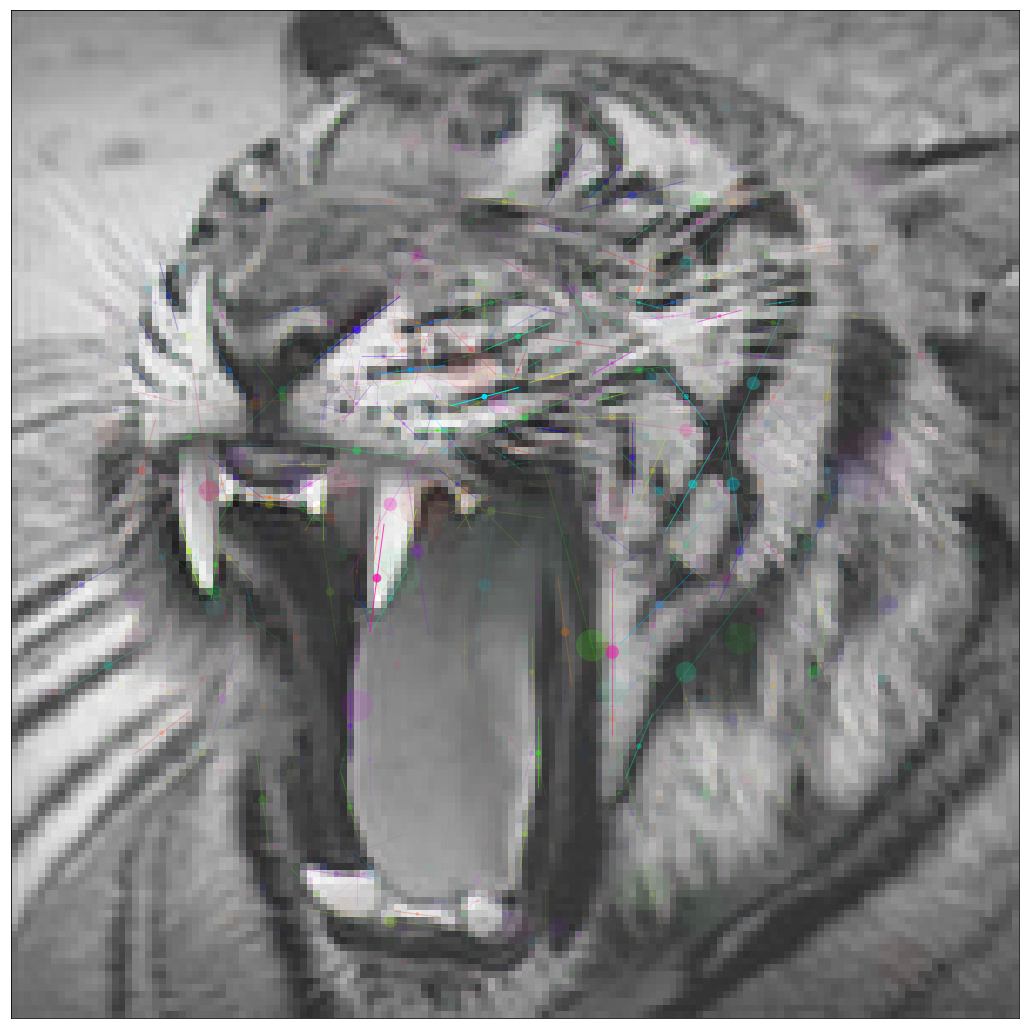

In [14]:
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
mp.pe.figsize_edges = .382 * fig_width  # useful for papers
mp.pe.figsize_edges = 9 # useful in notebooks
mp.pe.line_width = 1.
mp.pe.scale = 1.
fig, a = mp.show_edges(edges, image=image, show_phase=True)

On reconstruit l'image :

remaining energy  =  28.78334647976697 %


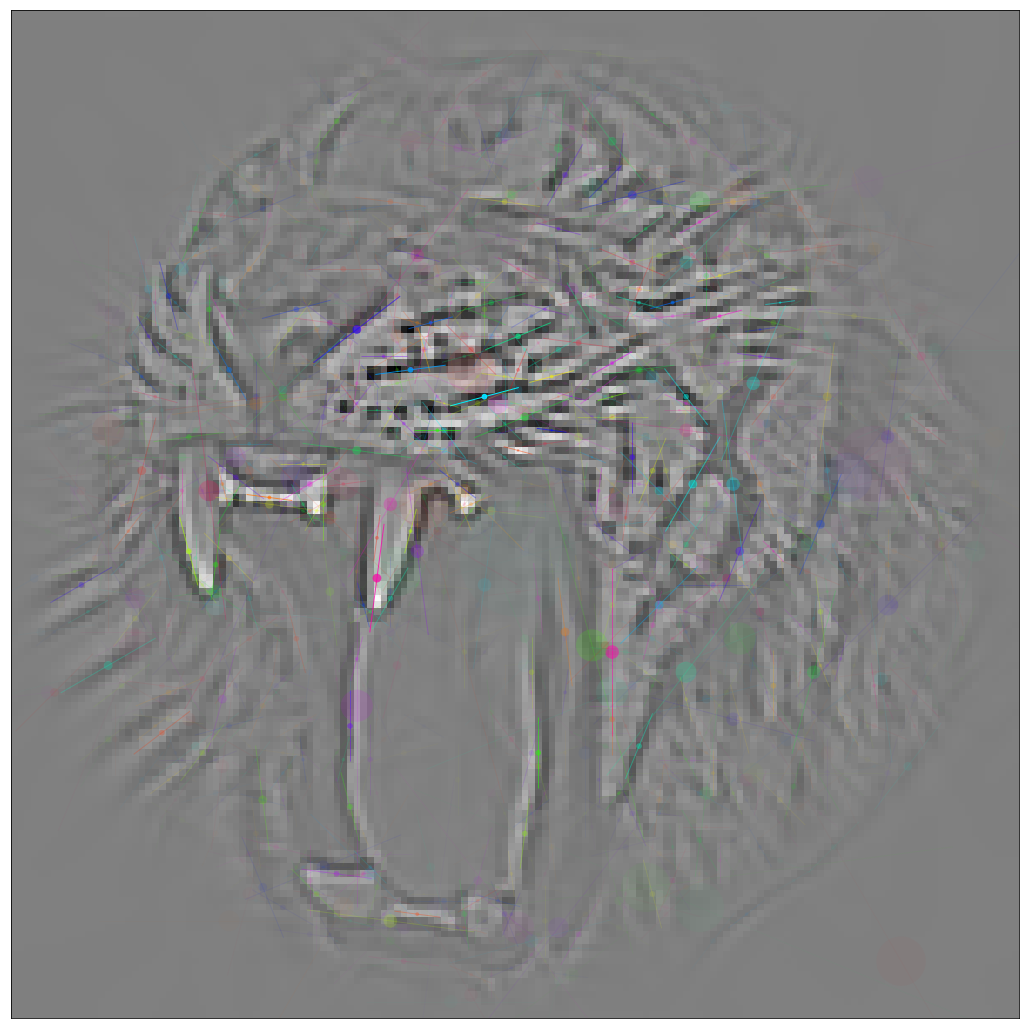

In [17]:
image_rec = mp.reconstruct(edges)
print('remaining energy  = ', ((mp.whitening(image)-image_rec)**2).sum()/((mp.whitening(image))**2).sum()*100, '%')
fig, a = mp.show_edges(edges, image=image_rec);

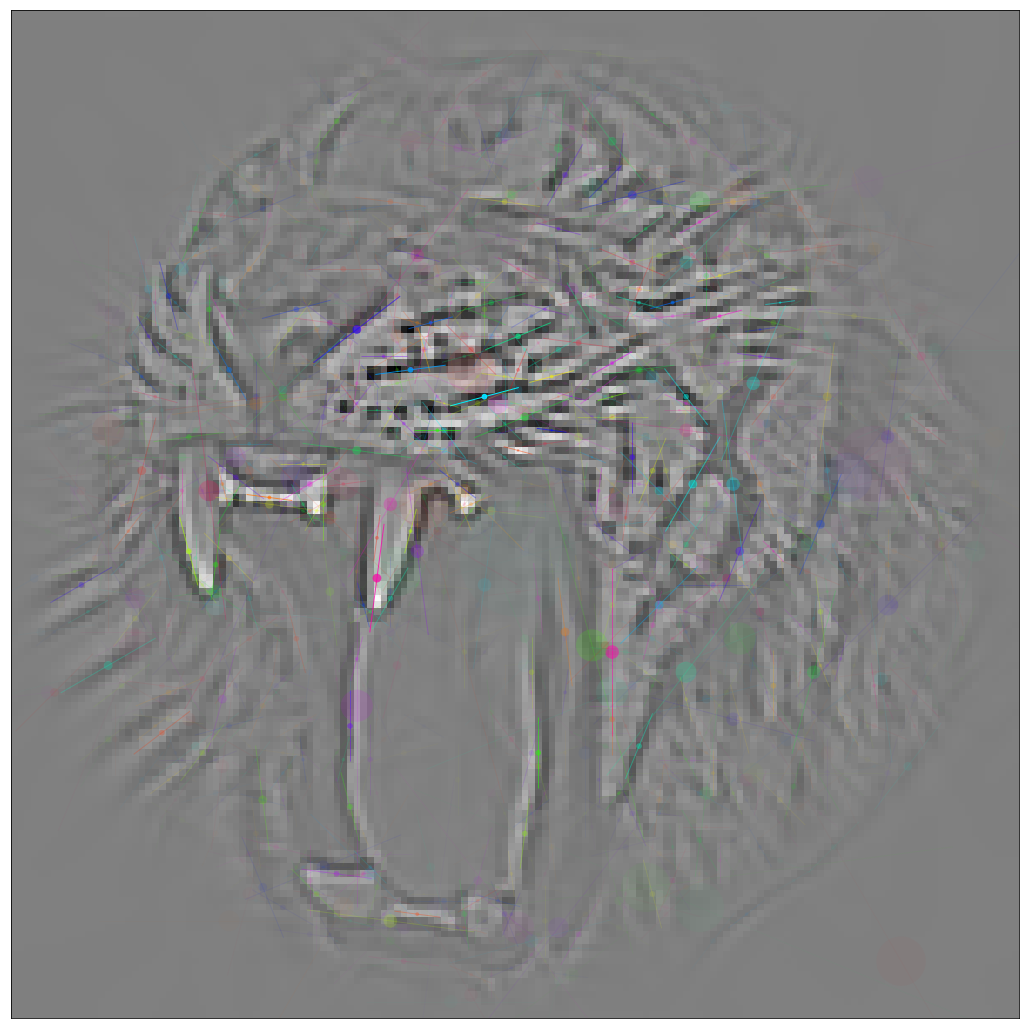

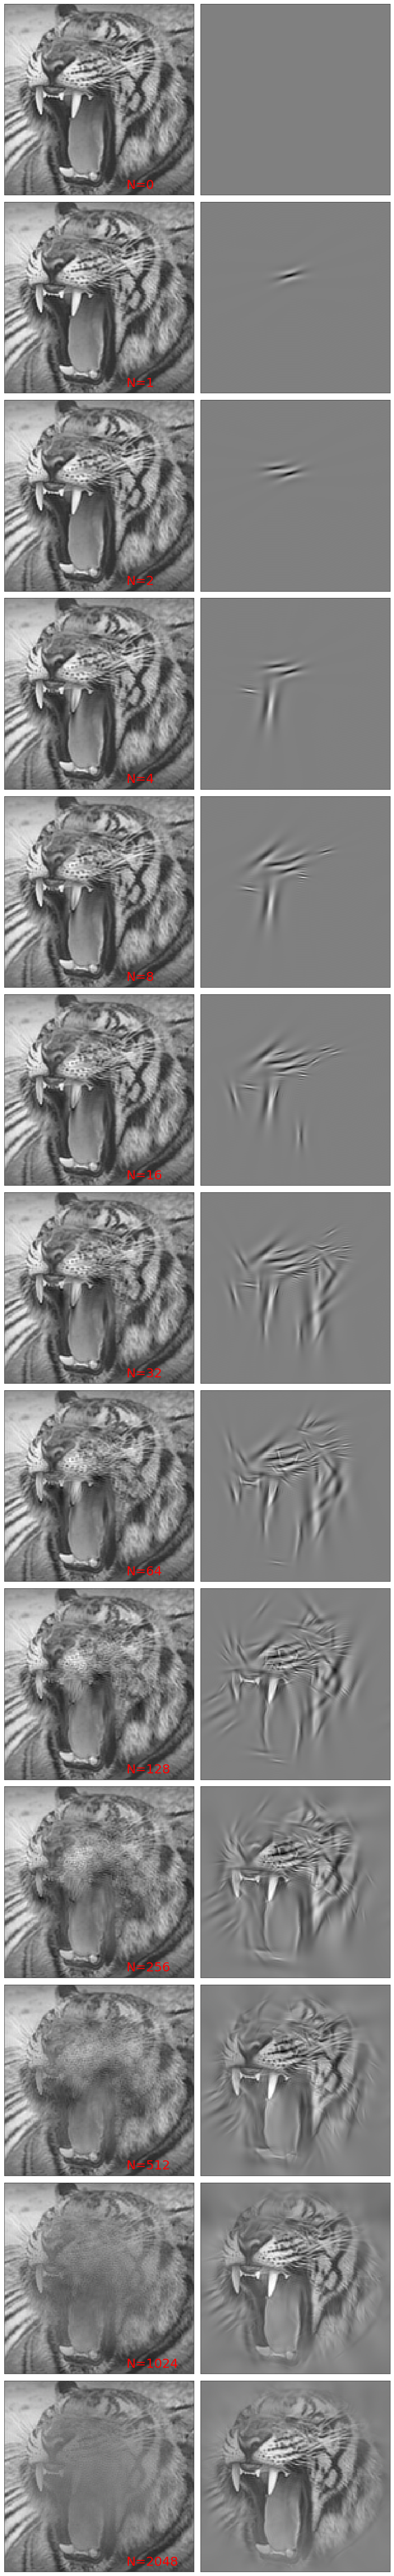

In [19]:


list_of_number_of_edge = [ 0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] # np.logspace(1, 10, 10, base=2) #

fig_width = 14
vmax = 1.
fig, axs = plt.subplots(len(list_of_number_of_edge), 2, figsize=(fig_width, fig_width/2*len(list_of_number_of_edge)))
vmax = image.max()
for i_ax, number_of_edge in enumerate(list_of_number_of_edge):
    edges_ = edges[:, :number_of_edge][..., np.newaxis]
    image_rec = mp.dewhitening(mp.reconstruct(edges_))
    fig, axs[i_ax, 0] = mp.imshow((image-image_rec)/vmax, fig=fig, ax=axs[i_ax, 0], norm=False)
    axs[i_ax, 0].text(96, 144, 'N=%d' % number_of_edge, color='red', fontsize=32)
    fig, axs[i_ax, 1] = mp.imshow((image_rec), fig=fig, ax=axs[i_ax, 1], norm=False)
    plt.tight_layout()



